# <u>***Real Estate Analytics: Module 6 Assignment*** </u>

#### It is highly recommended that you use the research grid to work on this problem set for efficiency

In [42]:
import sys, os

if 'dx2191' in os.getcwd():
    sys.path.append(r"/user/dx2191/REA/Module6/") # developer's path (ignore this)
else:
    module_path = r"/shared/share_realestate_analytics/Module6_7_resi_mortgage/" # path to the shared folder
    if module_path not in sys.path:
        sys.path.append(module_path)

# Import codes from the shared folder
import Code.Util as util
from Code.settings import *
import Code.read_data as data_reader

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Markdown, display

pd.set_option('display.max_columns', None) #Allows us to see all columns

### Origination Data Description

In [200]:
origination_data = util.readPickle(pset_5_data_path, 'pset5_data_origination.pkl')
origination_data_names = ['Loan Sequence Number', 'Unpaid Principal Balance', 'Annualized Interest Rate', 'Loan Term in Months', 'DTI', 'Credit Score', 'Cumulative LTV', 'Quarter of Origination', 'First Payment Date', 
'State', 'Quarter of Origination', 'Monthly Interest Rate', 'Scheduled Monthly Total Payment']
pd.DataFrame(dict(zip(list(origination_data), origination_data_names)).items(), columns = ['Given Name', 'Description']) 

,Given Name,Description
0,seq_num,Loan Sequence Number
1,upb,Unpaid Principal Balance
2,int_rate,Annualized Interest Rate
3,loan_term,Loan Term in Months
4,dti,DTI
5,crdt_scr,Credit Score
6,cltv,Cumulative LTV
7,quarter,Quarter of Origination
8,frst_pay_dt,First Payment Date
9,prop_state,State


### Monthly Data Description

In [201]:
monthly_data = util.readPickle(pset_5_data_path, 'pset5_data_monthly.pkl')
monthly_data_names = ['Loan Sequence Number', 'Month of observation', 'Unpaid Principal Balance', 'Delinquency Status', 'age of the mortgage', 'Months to Maturity' ]
pd.DataFrame(dict(zip(list(monthly_data), monthly_data_names)).items(), columns = ['Given Name', 'Description']) 

,Given Name,Description
0,seq_num,Loan Sequence Number
1,rep_period,Month of observation
2,cur_upb,Unpaid Principal Balance
3,cur_delinq,Delinquency Status
4,age,age of the mortgage
5,mts_to_maturity,Months to Maturity


# Question 1: Mortgage Prepayment Analysis

## There are lots of sub-questions. Some of them have been fully coded for you, some partly coded. Each of them require no more than 1-4 lines of code each. 

1. Read the the origination and monthly datasets from here: 

r'/Data/problem_set_5/pset5_data_origination.pkl'

r'/Data/problem_set_5/pset5_data_monthly.pkl'

2. The have been pre-cleaned for the most part. For this question, just use the 30 year mortgages. The column names are the same as the data discussed in the class and you should be able to find most of the code you need in the codes we used in class. You may refer to the variable descriptions here if you like: http://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf

3. Read the 30Y Fixed rate mortgage using the function return_rates_30y() in read_data.py, calculate the rate incentive wrt the 30Y Fixed Rate Mortgage. 

4. Recall the calculation of voluntary prepayment:

$$I_t = r_{t} * upb_{t-1}$$
$$PS_t = PMT_t - I_t$$
$$PA_t = upb_{t-1} - upb_{t}$$
$$VP_t = PA_t - PS_t$$
where:

$I_t$ = Interest Amt. paid in month t, 
$r_{t}$ = monthly interest rate, 
$upb_{t-1}$ = Unpaid principal balance in the previous month,
$PS_t$ = scheduled principal amount paid,
$PMT_t$ = Monthly Instalment to be paid. Calculated and given to you,
$PA_t$ = principal Amortization,
$VP_t$ = Voluntary prepayment

5. For each month, calculate the quartile to which the mortgage belongs to in terms of the mortgage size (upb) and the coupon (interest rate)

6. Calculate the CPR for each mortgages size quartile every month. Plot and compare the CPR for quartile 1 (smallest mortgages) against the CPR for quartile 4(largest mortgages). Explain your findings.

7. Calculate the CPR for each mortgages coupon quartile every month. Plot and compare the CPR for quartile 1 (lowest coupons) against the CPR for quartile 4(highest coupons). Explain your findings.

8. Pool together data across time, first plot CPR against rate-incentives. For simplicity, you can assume that the rate incentive for the pool is the simple average of the rate incentives of all mortgages in the pool. Are you able to replicate the S-Shaped plot as discussed in the class? 

Next, plot CPR against rate-incentives for each mortgage coupon quartie (1, 2, 3 and 4) separately, i.e., 4 plots in total. Do you still see the S-shaped plots for all the quartiles?

Now, utilize your findinds above to explain the S-shape in the whole sample: What is the composition of borrowers belonging to oval A vs. oval B below? What drives the S-shape? And what could be the reason why some borrowers prepay, while others do not given the same rate incentive?

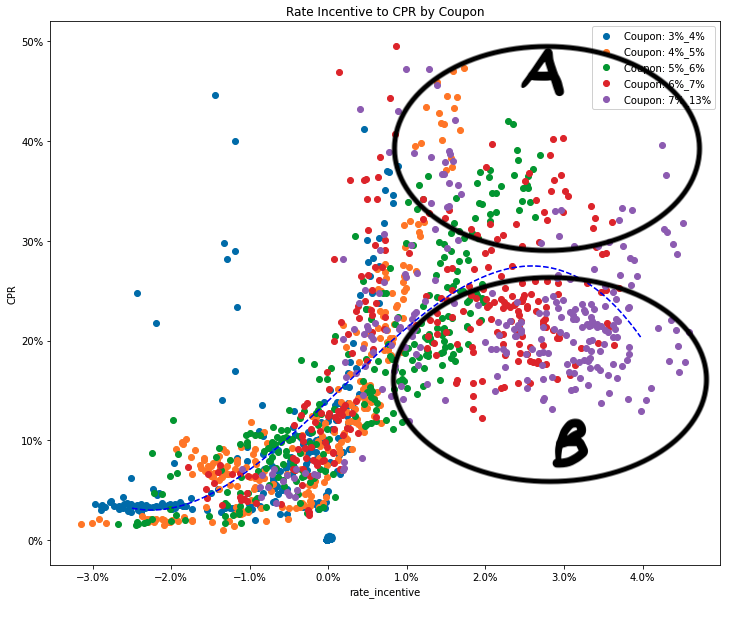


## Hints

1. Make sure you sort the monthly dataframe first by sequence number and then by rep_period. Refer [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

2. The data you have is FRM only. Subset mortgages with a loan term of 30 years

3. Merge rates_30y to monthly data

4. Follow the steps given in the question sequentially. 
- Calculate previous month's unpaid principal balance. Use pandas shift within a group as describe [here](https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group)
- Calculate interest payment = previous month's upb * MONTHLY interest rate
- Calculate scheduled principal amortization (scheduled payment - interest payment)
- Calculate voluntary principal payment = actual principal amortized - scheduled principal amortization
- Calculate rate incentive exactly as done in class

5. For each month, calculate the quartile to which the mortgage belongs to in terms of the mortgage size (upb) and the coupon (interest rate). This should be done in two steps:
- Groupby time period (rep_period)
- for each group assign every mortgage into quartiles. Use [this](https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/) tutorial if you need help on how to 'bin' the mortgages into quartiles 

6. & 7 Calculate the CPR for each month for this pool using the voluntary prepayment
You have been given the main function: prepayment_calculation(). You have to consturct a wrapper function that first groups by quartile-rep period and within each group, calculates the CPR. For the final answer, I need two plots, each plot has 2 lines:
- Plot 1: CPR for Mortgage Size Quartile 1, CPR for Mortgage Size Quartile 4
- Plot 2: CPR for Coupon Rate Quartile 1, CPR for Coupon Rate Quartile 4

8. CPR vs Rate incentive
- plot the overall CPR you Calculated on Y axis against Rate incentive on X axis. 1 single plot
- plot the CPR you Calculated above for each of the 4 coupon quartiles on Y axis against Rate incentive on X axis. Just 4 individual plots



# Code and Answers

/tmp/7424276.1.debian.q/ipykernel_87969/4076424381.py:72: RuntimeWarning:

invalid value encountered in scalar divide

/tmp/7424276.1.debian.q/ipykernel_87969/4076424381.py:72: RuntimeWarning:

invalid value encountered in scalar divide



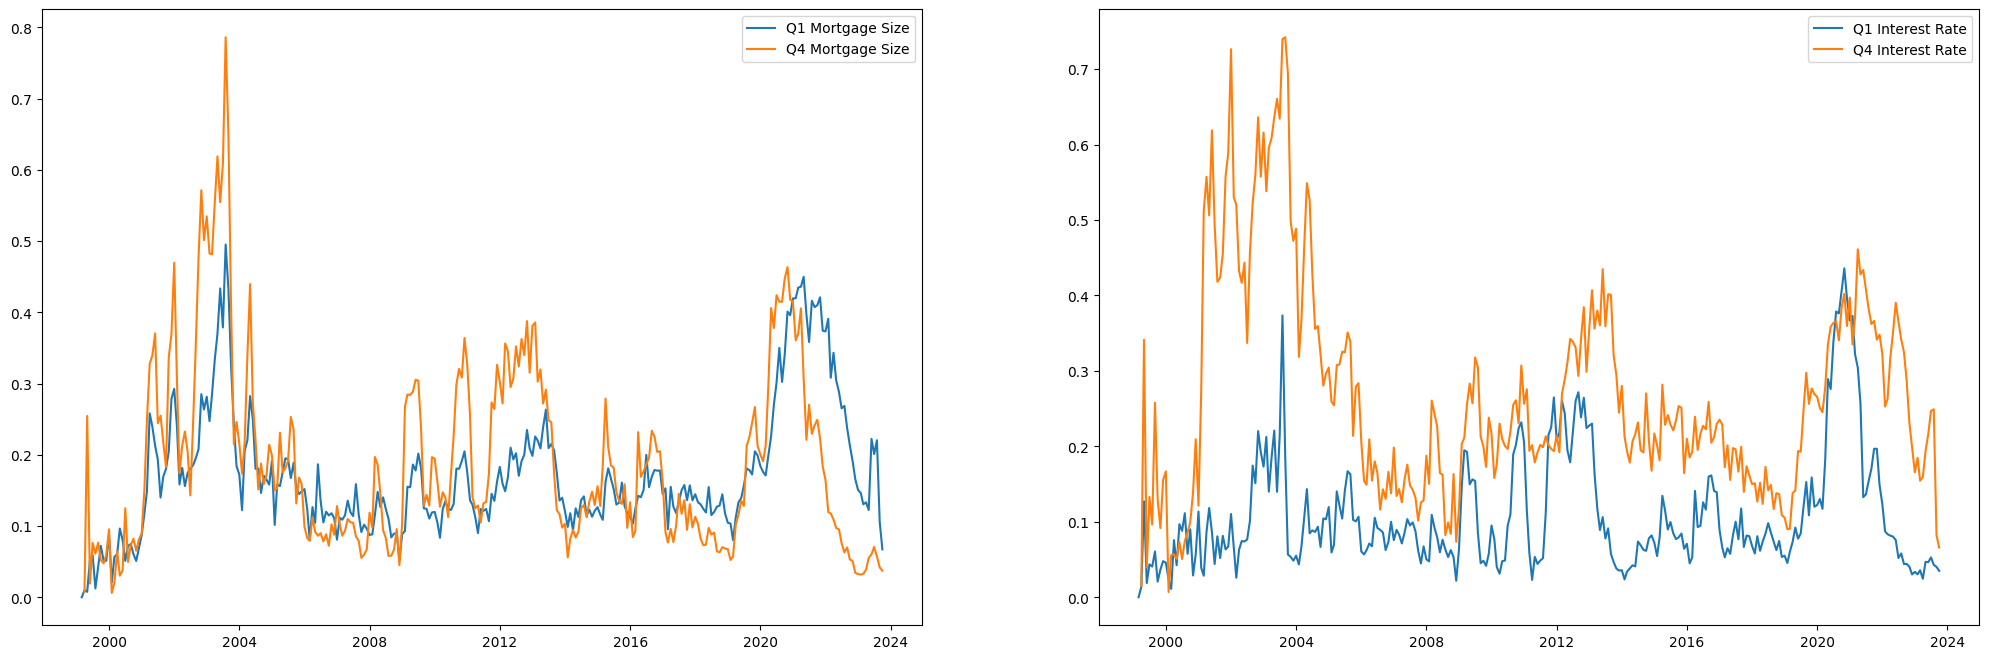

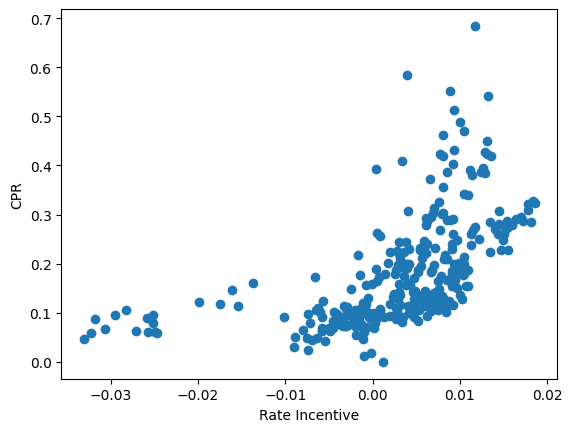

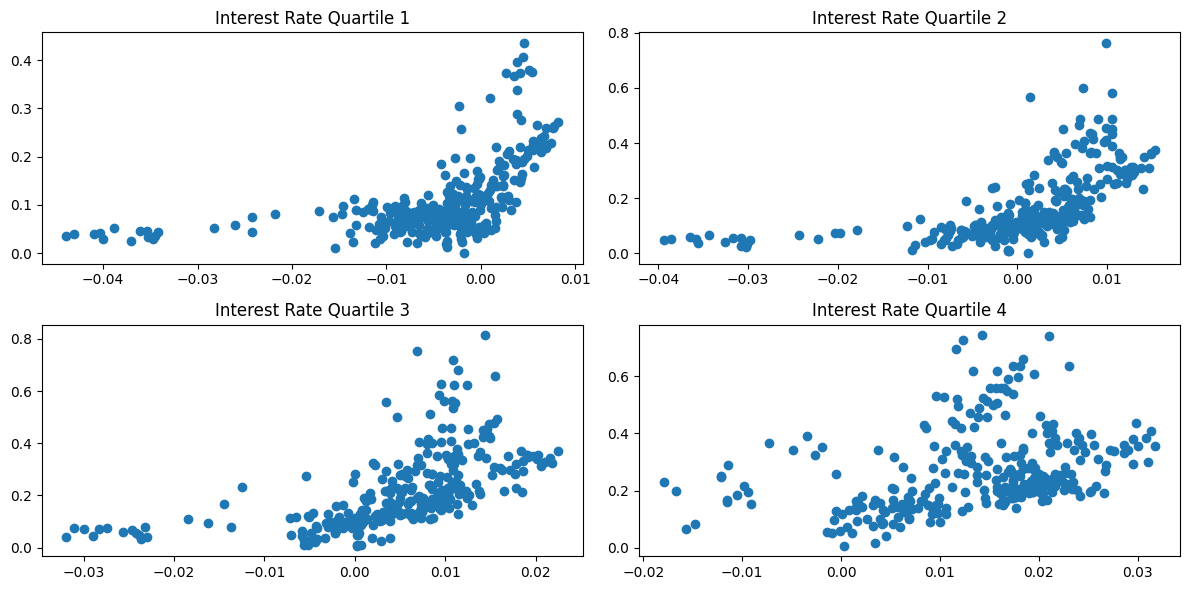

In [279]:
# 1. Read the the origination and monthly datasets

origination_data = util.readPickle(pset_5_data_path, 'pset5_data_origination.pkl')
monthly_data = util.readPickle(pset_5_data_path, 'pset5_data_monthly.pkl')

# sort momthly dataframe by sequence number and rep_period
# ----------------------------------- #
monthly_data.sort_values(by=['seq_num','rep_period'], inplace=True)
# ----------------------------------- #

# 2. For this question, just use the 30 year mortgages. 

# ----------------------------------- #b
monthly_data = monthly_data[monthly_data['mts_to_maturity']+monthly_data['age']==360]
# ----------------------------------- #

# 3. Read the 30Y Fixed rate mortgage and merge it to the data

rates_30y = data_reader.return_rates_30y('prepayment')
monthly_data = pd.merge(monthly_data, rates_30y, how='left', on='rep_period')


# 4. Calculating prepayment.

# ----------------------------------- #
# 8 Lines
all_df = monthly_data.merge(origination_data, on='seq_num')
all_df['prev_month_upb'] = all_df['cur_upb'].shift(1)
all_df['int_pmt'] = all_df['prev_month_upb'] * all_df['int_rate_perc_monthly']
all_df['principal_pmt'] = all_df['PMT'] - all_df['int_pmt']
all_df['principal_amortized'] = all_df['prev_month_upb'] - all_df['cur_upb']
# Add the np.maximum below so that we only consider prepayment and not cases where people fall behind on their mortgages:
all_df['prepayment'] =  np.maximum(0, all_df['principal_amortized'] - all_df['principal_pmt'])
all_df['rate_incentive'] = (all_df['int_rate']*.01) - all_df['MORTGAGE30US']
# ----------------------------------- #

# 5. For each month, calculate the quartile to which the mortgage belongs to in terms of the mortgage size (upb) and the coupon (interest rate)

# ----------------------------------- #
# Find the quartiles first, and then use np.select to assign each mortgage to a quartile (could not figure out how to accomplish with pd.cut)
all_df = all_df.merge(all_df.groupby('rep_period')['int_rate'].quantile([.25, .5, .75]).unstack().reset_index(), on='rep_period')

conditions = [
    all_df['int_rate'] <= all_df[0.25],
    (all_df['int_rate'] > all_df[0.25]) & (all_df['int_rate'] <= all_df[0.5]),
    (all_df['int_rate'] > all_df[0.5]) & (all_df['int_rate'] <= all_df[0.75]),
    all_df['int_rate'] > all_df[0.75]
]

choices = [1, 2, 3, 4]
all_df['int_rate_quartile'] = np.select(conditions, choices)
all_df.drop([.25, .5, .75], axis=1, inplace=True)

all_df = all_df.merge(all_df.groupby('rep_period')['upb'].quantile([.25, .5, .75]).unstack().reset_index(), on='rep_period')

conditions = [
    all_df['upb'] <= all_df[0.25],
    (all_df['upb'] > all_df[0.25]) & (all_df['upb'] <= all_df[0.5]),
    (all_df['upb'] > all_df[0.5]) & (all_df['upb'] <= all_df[0.75]),
    all_df['upb'] > all_df[0.75]
]
all_df['upb_quartile'] = np.select(conditions, choices)
all_df.drop([.25, .5, .75], axis=1, inplace=True)
# ----------------------------------- #

# 6 & 7 Calculate the CPR for each month by two groupers

def prepayment_calculation(df):
    prepayment = np.sum(df['prepayment'])
    balance_agg = np.sum(df['prev_month_upb'])

    SMM = prepayment / balance_agg
    CPR = util.smm_to_cpr(SMM)
    
    rate_incentive = np.mean(df['rate_incentive'])
    return [SMM, CPR, prepayment, balance_agg, rate_incentive]

# ----------------------------------- #
upb_quartile_groups = all_df.groupby(['upb_quartile','rep_period']).apply(prepayment_calculation)
upb_quartile_groups = pd.DataFrame(upb_quartile_groups).reset_index()
upb_quartile_groups[['SMM', 'CPR', 'prepayment', 'balance_agg', 'rate_incentive']] = pd.DataFrame(upb_quartile_groups[0].tolist())

int_quartile_groups = all_df.groupby(['int_rate_quartile','rep_period']).apply(prepayment_calculation)
int_quartile_groups = pd.DataFrame(int_quartile_groups).reset_index()
int_quartile_groups[['SMM', 'CPR', 'prepayment', 'balance_agg', 'rate_incentive']] = pd.DataFrame(int_quartile_groups[0].tolist())
# Plot the graph
fig, ax = plt.subplots(1, 2, figsize = (25, 8))

# ----------------------------------- #
ax[0].plot(upb_quartile_groups[upb_quartile_groups['upb_quartile']==1]['rep_period'], upb_quartile_groups[upb_quartile_groups['upb_quartile']==1]['CPR'],label='Q1 Mortgage Size')
ax[0].plot(upb_quartile_groups[upb_quartile_groups['upb_quartile']==4]['rep_period'], upb_quartile_groups[upb_quartile_groups['upb_quartile']==4]['CPR'],label='Q4 Mortgage Size')
ax[0].legend()
ax[1].plot(int_quartile_groups[int_quartile_groups['int_rate_quartile']==1]['rep_period'], int_quartile_groups[int_quartile_groups['int_rate_quartile']==1]['CPR'],label='Q1 Interest Rate')
ax[1].plot(int_quartile_groups[int_quartile_groups['int_rate_quartile']==4]['rep_period'], int_quartile_groups[int_quartile_groups['int_rate_quartile']==4]['CPR'],label='Q4 Interest Rate')
ax[1].legend()
# ----------------------------------- #

plt.show()

# 8 CPR vs Rate incentive

# ----------------------------------- #
# Get CPR and average rate incentive for each time period: 
period_groups = all_df.groupby('rep_period').apply(prepayment_calculation)
period_groups = pd.DataFrame(period_groups).reset_index()
period_groups[['SMM', 'CPR', 'prepayment', 'balance_agg', 'rate_incentive']] = pd.DataFrame(period_groups[0].tolist())
# Plot CPR and rate incentive: 
plt.scatter(period_groups['rate_incentive'], period_groups['CPR'])
plt.xlabel('Rate Incentive')
plt.ylabel('CPR')
plt.show()
# ----------------------------------- #

fig, ax = plt.subplots(2,2, figsize = (12, 6))

# ----------------------------------- #
for i in range(4):
    row = i // 2 
    col = i % 2   
    ax[row,col].scatter(int_quartile_groups[int_quartile_groups['int_rate_quartile']==i+1]['rate_incentive'], int_quartile_groups[int_quartile_groups['int_rate_quartile']==i+1]['CPR'])
    ax[row, col].set_title('Interest Rate Quartile {}'.format(i+1))
# ----------------------------------- #

fig.tight_layout()
plt.show()

## Discussion for Question 1

In the first chart, we see that the CPR for large mortgages (Q4) is generally higher than the CPR for small mortgages. This makes sense for two reasons. First, people with large mortgages are generally wealthier, and consequently may be more financially savvy about refinancing their homes when rates decline. Second, larger mortgages would see greater savings from refinancing, which would increase the incentive to do so given the meaningful upfront costs. 

In the second chart, we see that homes with high interest rates (Q4) generally have a higher CPR than those with low interest rates (Q1). This makes sense as homes with high interest rates would have a greater rate incentive. 

In chart three, we do see the S-curve that we discussed in class. This curve shows that CPR increases with rate incentive to a point, but then declines because at the highest rate incentives there are few mortgages left to refinance, and the remaining ones generally have some issue or owners who do not understand how to refinance. 

In the four final charts, we notice that the inviduals with the lowest interest rates (Q1) are quite responsive to rate incentives. This makes sense as the people with the lowest interest rates are probably those who are quick to refinance for a lower rate. Conversely, indivduals with the highest interest rates (Q4) are much less responsive. This is also expected as people with the highest rates are most likely those that cannot or will not refinance. Overall, the S shape appears most present in Q2 and Q3, with Q1 being more of an exponential fit and Q4 being flatter. 

Thus, it appears that individuals in Oval A are more likely to have lower interest rates, and the individuals in Oval B are more likely to have high interest rates. There could be many reasons why people in Oval B do not refinance. For example, they could have a terrible credit score making it difficult, or they could not have the financial knowledge to know that it is a possibility, or the owner could have passed away and the estate is stuck in probate.

# Question 2: Studying the duration of Mortgages 

## There are lots of subquestions. Some of them have been fully coded for you, some partly coded. Each of them require no more than 1-3 lines of code each. 

This question requires you to know about **Bond Duration** as a concept. This was covered in the capital markets course. If you need a quick refresher, read the investopedia article [here](https://www.investopedia.com/terms/d/duration.asp). We are interested in calculcating the Macaulay Duration.

1. Read the Origination data here: '/Data/problem_set_5/pset5_data_origination.pkl' and the monthly data file here: '/Data/problem_set_5/pset5_data_monthly.pkl'

2. They have been pre-cleaned for the most part. For this question, just use the 30 year mortgages. The column names are the same as the data discussed in the class and you should be able to find most of the code you need in the codes we used in class. You may refer to the variable descriptions here if you like: http://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf Merge the origination and monthly data.

3. For Mortgages that do not end as of Q2 2023, we cannot properly estimate the duration because there are payments yet to come. To handle this, we will assume that the loans immediately prepay after the last date for which we have the data. 

4. Only pick mortgages that originated between 2001 and 2014 (till Q4 2014). This has been coded for you.

5. Calculate the interest amount paid in each month

6. Total Monthly Cash Flow = interst payment + principal payment. 

7. Calculate age-weighted Cash flow, i.e. age * cash flow

8. Calculate the discount factor.  Discount factor = 1 / ((1 + monthly interest rate)^age) I.e. assume that the yield-to-maturioty is the same as the interest rate on the mortgage

9. Duration of a mortgage is then the sum the present values of all age-weighted cash flows. 

10. Calculate Mean Duration of all mortgages that initiated in a month 

11. Compare the mean duration of all mortgages against the prepayment. What do you see? Are they related? Why?

12. (Non-Coding Question) In the sample code, we calculate the duration of a 30Y fixed coupon bond. Compare this duration to the duration of a mortgage. What is the difference? Why do you think that is the case?

## Hints and Suggestions

1. Make sure you sort the monthly dataframe first by sequence number and then by rep_period. Refer [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

2. The data you have is FRM only. Subset mortgages with a loan term of 30 years. Merge the origination and monthly data.

3. To do this, for all mortgages where the last available UPB is non-zero, i.e. it is still live as of the end of our sample, add an dditional row at the end of these individual rows with a zero UPB.

If you **CAN'T** figure this out, and it is complicated,  take only the mortgages that we know for sure have ended. Refer to the answer [here](https://stackoverflow.com/questions/41450963/using-pandas-to-find-minimum-values-of-grouped-rows). Groupby the sequence number and find the mean. Subset the dataframe to only keep mortgages with 0 minimum UPB. However, note that doing this will underestimate the duration. 

4. This has been coded for you.

5. This is exactly like step 4 in Q1. interest amount = previous month's upb * MONTHLY interest rate

6. Refer to definitions in Q1. Note that you might find a few instances (<0.1%) where this cash flow is negaive for various reasons. You can either ignore it or change all negative cash flows to 0 (Something like if the cash flow <0, then the cash flow = 0)
7. None
8. None
9. To Calculate the present value, multiply the age weighted cash flow with the discount factor and divide it by the initial unpaid principal balance of the mortgage

10. Mean Duration of all mortgages that initiated in a month is the arithmetic mean of all durations. You can get prepayment directly from the previous question.

11. Here, please make a single plot with two lines:
- One line the plots the duration of mortgages initiated in a month by time
- A second line that plots the CPR of all active mortgages over time.

# Sample Code

Note really. Let's compute something similar to what you have been asked in the question. i.e. instead of computing the duration of a mortgage, we will compute the duration of a 30Y coupon paying bond. The process is similar for mortgages. Hope this helps you develop some intuition on how to calculate the duration of the mortgage. 

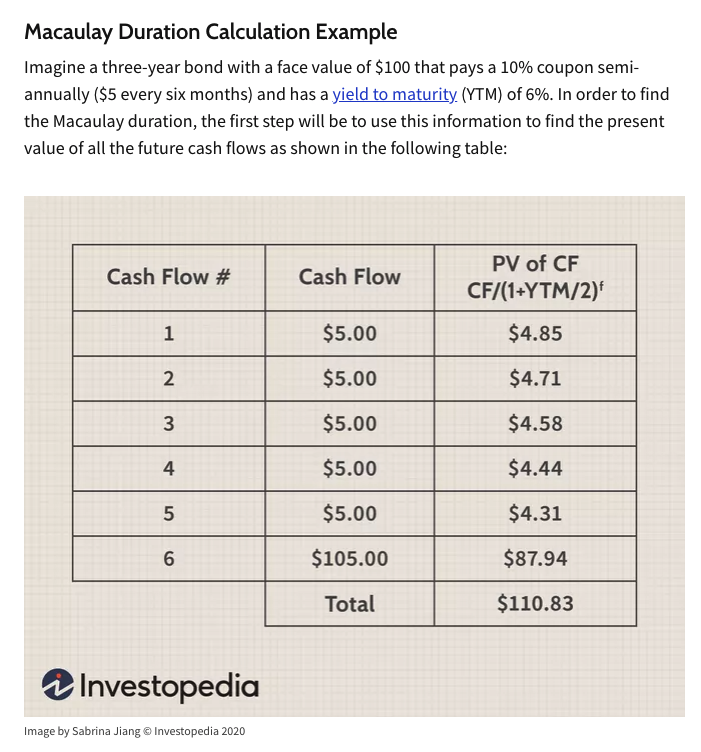

Consider a 30Y coupon paying bond with 5% (annualized) coupon paid monthly and a $1000 Par at time t = 30 years. Assume that the Yield to maturity is 5% 

Yield to maturity analyzes the rate of return for the investor on an annual basis shown as a percentage rate, assuming they hold the investment to its maturity. It takes into account the current and future value of the asset and determines the overall yield in relation. Note that for mortgage Question, you can assume YTM = interest rate.

In [362]:
coupon = 0.05
term = 360 # 30 years = 360 months
YTM = 0.05
Par = 1000

frequency = 'monthly'
frequency_of_coupons = 12
monthly_coupon = coupon / frequency_of_coupons
monthly_ytm = YTM / frequency_of_coupons

df = pd.DataFrame()
df['Age'] = range(1, term + 1)
df['Cash Flow'] = monthly_coupon * Par

# add balloon payment
df.loc[term + 1] = [term, Par]

# calculate time weighted cash flows
df['Time_weighted_CF'] = df['Age'] * df['Cash Flow']

# calculate discount factor and discounted time weighted cash flows
df['Discount Factor'] = 1 / ((1 + monthly_ytm) ** (df['Age']))
df['Discounted Time_weighted_CF'] = df['Time_weighted_CF'] * df['Discount Factor']

# Calculate the price of the bond (present value = sum of discounted cash flows)
# Note that since the YTM = coupon rate, the PV = the par value, i.e. $1000
PV = np.sum(df['Cash Flow'] * df['Discount Factor'])

# Calculate the Macaulay duration as the sum of the present values of the time weighted cash flows divided by the Price (PV)  
duration = df['Discounted Time_weighted_CF'].sum() / PV

# Note that this duration is in months since we have considered monthly cash flows so far, convert it to years:
duration = duration / 12

print("The duration of a ${} {} year Bond paying {}% annualized {} is: {} Years".format(Par, term/12, coupon*100, frequency, round(duration, 2)) )

The duration of a $1000 30.0 year Bond paying 5.0% annualized monthly is: 15.59 Years


Similarly, you have other cases: 

- The duration of a USD 1000 15.0 year Bond paying 1.0% annualized monthly is: 13.94 Years
- The duration of a USD 1000 15.0 year Bond paying 5.0% annualized monthly is: 10.5 Years
- The duration of a USD 1000 15.0 year Bond paying 10.0% annualized monthly is: 7.82 Years (How I wish!)

$$---------------$$

- The duration of a USD 1000 30.0 year Bond paying 1.0% annualized monthly is: 25.93 Years
- The duration of a USD 1000 30.0 year Bond paying 10.0% annualized monthly is: 9.58 Years

# Code and Answers

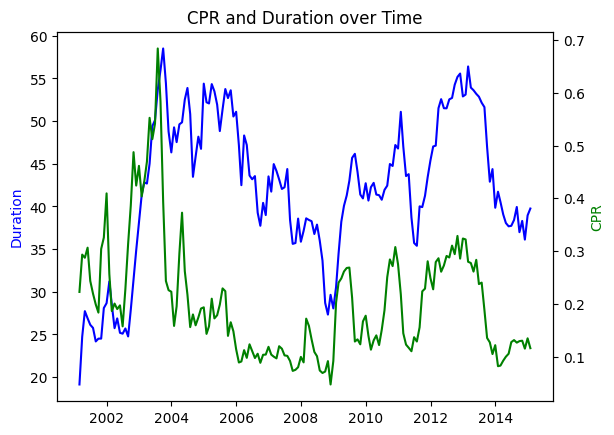

In [495]:
# 1. Read the the origination and monthly datasets

origination_data = util.readPickle(pset_5_data_path, 'pset5_data_origination.pkl')
monthly_data = util.readPickle(pset_5_data_path, 'pset5_data_monthly.pkl')

# sort momthly dataframe by sequence number and rep_period
# ----------------------------------- #
monthly_data.sort_values(by=['seq_num','rep_period'], inplace=True)
# ----------------------------------- #

# 2. For this question, just use the 30 year mortgages. Merge dataset

# ----------------------------------- #
monthly_data = monthly_data[monthly_data['mts_to_maturity']+monthly_data['age']==360]
# ----------------------------------- #
monthly_data = pd.merge(monthly_data, origination_data, on = 'seq_num', how = 'inner')
del origination_data
gc.collect()

# 3. For Mortgages that do not end as of Q2 2021, we cannot properly estimate the duration because there are payments yet to come. 
# To handle this, we will assume that the loans immediately prepay after the last date for which we have the data. 

# ----------------------------------- #
# 8 Lines
# ----------------------------------- #

# ------- OR - ALTERNATIVE METHOD [PERFORM ONLY ONE] 

# 3. Take only the mortgages that we know for sure have ended. We cannot take mortgages that are still live as of 2021Q2
# This drops ~ 20% of all mortgages.

# ----------------------------------- #
last_rows = monthly_data.groupby('seq_num').last().reset_index()
last_rows['is_0_at_end'] = last_rows['cur_upb']==0
monthly_data = monthly_data.merge(last_rows[['seq_num','is_0_at_end']],on='seq_num')
monthly_data = monthly_data[monthly_data['is_0_at_end'] == True]
# ----------------------------------- #

# 4. Only pick mortgages that originated between 2001 and 2015
monthly_data['first_pay_dt'] = monthly_data.groupby('seq_num')['rep_period'].transform('min')
monthly_data = monthly_data[(monthly_data['quarter'] <= '2015Q1') & (monthly_data['first_pay_dt'].dt.date <= dt.date(2015, 1, 1))]
monthly_data = monthly_data[(monthly_data['quarter'] >= '2001Q1') & (monthly_data['first_pay_dt'].dt.date >= dt.date(2001, 1, 1))]

# 5. Calculate the interest amount paid in each month
# ----------------------------------- #
monthly_data['prev_month_upb'] = monthly_data['cur_upb'].shift(1)
monthly_data['int_pmt'] = monthly_data['prev_month_upb'] * monthly_data['int_rate_perc_monthly']
# ----------------------------------- #

# 6. Total Monthly Cash Flow = interst payment + principal payment. 
# some small -ve values (~ 4000 out of 6million <0.1%) make them zero

# ----------------------------------- #
monthly_data['principal_amortized'] = monthly_data['prev_month_upb'] - monthly_data['cur_upb']
monthly_data['monthly_cash_flow'] = monthly_data['principal_amortized'] + monthly_data['int_pmt']
#removes the small number of values that are less than 0
monthly_data.loc[monthly_data['monthly_cash_flow'] < 0, 'monthly_cash_flow'] = 0 
# ----------------------------------- #

# 7. Calculate age-weighted Cash flow, i.e. age * cash flow

# ----------------------------------- #
monthly_data['age_weighted_cash_flow'] = monthly_data['monthly_cash_flow'] * monthly_data['age']
# ----------------------------------- #

# 8. Calculate the discount factor.  Discount factor = 1 / ((1 + monthly interest rate)^age)

# ----------------------------------- #
monthly_data['discount_factor'] = 1/((1+monthly_data['int_rate_perc_monthly'])**monthly_data['age'])
# ----------------------------------- #

# 9. Duration of a mortgage is then the sum the present values of all age-weighted cashflows. 
# To Calculate the present value, multiply the age weighted cash flow with the discount factor and divide it by the initial unpaid principal balance of the mortgage

# ----------------------------------- #
monthly_data['Discounted Time_weighted_CF'] = monthly_data['age_weighted_cash_flow'] * monthly_data['discount_factor']
monthly_data['PV'] = monthly_data['Discounted Time_weighted_CF'] / monthly_data['upb']
durations = monthly_data.groupby('seq_num')['PV'].sum().reset_index()
durations.columns = ['seq_num','duration']
# ----------------------------------- #

# 10. Mean Duration of all mortgages that initiated in a month is the arithmetic mean of all durations. 
# get prepayment from the previous question

# ----------------------------------- #
# Merge in the 'first_pay_dt' column to the durations df: 
first_months = monthly_data.groupby('seq_num').first().reset_index()
durations = durations.merge(first_months[['seq_num','frst_pay_dt']], on='seq_num')
mean_duration_by_origination_month = durations.groupby('frst_pay_dt')['duration'].mean().reset_index()
mean_duration_by_origination_month.columns = ['month','duration']
# Get CPR by month from Question 1:
CPR_by_month = period_groups[['rep_period','CPR']].copy()
CPR_by_month.columns = ['month','CPR']
# Merge CPR data with duration data: 
duration_CPR = mean_duration_by_origination_month.merge(CPR_by_month,on='month')
# ----------------------------------- #

# 11. Plot the chart

# ----------------------------------- #
fig, ax1 = plt.subplots() 
ax1.plot(duration_CPR['month'],duration_CPR['duration'],label='Duration',color='blue')
ax1.set_ylabel('Duration',color='blue')
ax2 = ax1.twinx() 
ax2.plot(duration_CPR['month'],duration_CPR['CPR'],label='CPR',color='green')
ax2.set_ylabel('CPR',color='green')
plt.title('CPR and Duration over Time')
plt.show()
# ----------------------------------- #

## Discusssion for Question 2

In the chart above, we see that there is a clear postive correlation between CPR and duration. It seems that when CPR increases, the duration of mortgages originated in that month also rises. Perhaps this is because people generally refinance in response to a low-rate environment, and then after they lock in a low-rate mortgage they are less likely to refinance again. 

The main difference between the mortgage case and the 30-year bond example in the sample code is that the 30-year bond example has set repayment terms at the end of the 30 years. Conversely, mortgages are often repaid in advance, which creates considerable variability in the duration. 